In [220]:
"""Customer segmentation is a technique in which the customers divided based on their purchase history, gender, age, 
interest, etc. It is useful to get this information so that the store can get help in personalized marketing and 
provide customers with relevant deals."""
"""Here i have created an Predictive Model by using RANDOM FOREST CLASSIFIER which can predict 90% accurately 
whether the customer will going to purchase based on input data"""

In [222]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.patches import FancyArrowPatch
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import proj3d
from sklearn import metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [200]:
# Loading the csv dataset 
df = pd.read_csv('customer.csv')
df.head

<bound method NDFrame.head of     age  gender   review education purchased
0    30  Female  Average    School        No
1    68  Female     Poor        UG        No
2    70  Female     Good        PG        No
3    72  Female     Good        PG        No
4    16  Female  Average        UG        No
5    31  Female  Average    School       Yes
6    18    Male     Good    School        No
7    60  Female     Poor    School       Yes
8    65  Female  Average        UG        No
9    74    Male     Good        UG       Yes
10   98  Female     Good        UG       Yes
11   74    Male     Good        UG       Yes
12   51    Male     Poor    School        No
13   57  Female  Average    School        No
14   15    Male     Poor        PG       Yes
15   75    Male     Poor        UG        No
16   59    Male     Poor        UG       Yes
17   22  Female     Poor        UG       Yes
18   19    Male     Good    School        No
19   97    Male     Poor        PG       Yes
20   57  Female  Average 

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        50 non-null     int64 
 1   gender     50 non-null     object
 2   review     50 non-null     object
 3   education  50 non-null     object
 4   purchased  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [202]:
# Encode the 'purchased' column separately using LabelEncoder
df['purchased'] = LabelEncoder().fit_transform(df['purchased'])
df

,age,gender,review,education,purchased
0,30,Female,Average,School,0
1,68,Female,Poor,UG,0
2,70,Female,Good,PG,0
3,72,Female,Good,PG,0
4,16,Female,Average,UG,0
5,31,Female,Average,School,1
6,18,Male,Good,School,0
7,60,Female,Poor,School,1
8,65,Female,Average,UG,0
9,74,Male,Good,UG,1


In [203]:
# Applying Column Transformer to Variables
transformer = ColumnTransformer(
    transformers=[
        ('tnf1', OrdinalEncoder(categories=[['Poor', 'Average', 'Good']]), ['review']),
        ('tnf2', OrdinalEncoder(categories=[['School', 'UG', 'PG']]), ['education']),
        ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), ['gender'])
    ],
    remainder='passthrough'
)

# Apply the transformations to DataFrame
transformed_df = transformer.fit_transform(df)
print(transformed_df)

dff = pd.DataFrame(transformed_df)

[[ 1.  0.  0. 30.  0.]
 [ 0.  1.  0. 68.  0.]
 [ 2.  2.  0. 70.  0.]
 [ 2.  2.  0. 72.  0.]
 [ 1.  1.  0. 16.  0.]
 [ 1.  0.  0. 31.  1.]
 [ 2.  0.  1. 18.  0.]
 [ 0.  0.  0. 60.  1.]
 [ 1.  1.  0. 65.  0.]
 [ 2.  1.  1. 74.  1.]
 [ 2.  1.  0. 98.  1.]
 [ 2.  1.  1. 74.  1.]
 [ 0.  0.  1. 51.  0.]
 [ 1.  0.  0. 57.  0.]
 [ 0.  2.  1. 15.  1.]
 [ 0.  1.  1. 75.  0.]
 [ 0.  1.  1. 59.  1.]
 [ 0.  1.  0. 22.  1.]
 [ 2.  0.  1. 19.  0.]
 [ 0.  2.  1. 97.  1.]
 [ 1.  0.  0. 57.  1.]
 [ 1.  2.  1. 32.  0.]
 [ 0.  2.  0. 18.  1.]
 [ 2.  0.  0. 96.  0.]
 [ 1.  2.  0. 16.  1.]
 [ 2.  0.  0. 57.  0.]
 [ 0.  2.  0. 53.  0.]
 [ 0.  2.  0. 69.  0.]
 [ 0.  0.  1. 48.  0.]
 [ 1.  1.  0. 83.  1.]
 [ 1.  1.  1. 73.  0.]
 [ 0.  0.  0. 22.  1.]
 [ 1.  1.  1. 92.  1.]
 [ 2.  2.  0. 89.  1.]
 [ 1.  0.  1. 86.  0.]
 [ 0.  0.  1. 74.  1.]
 [ 2.  1.  0. 34.  1.]
 [ 1.  2.  1. 94.  1.]
 [ 2.  0.  0. 45.  0.]
 [ 0.  2.  1. 76.  0.]
 [ 2.  0.  1. 39.  0.]
 [ 2.  2.  1. 23.  1.]
 [ 2.  2.  0. 30.  1.]
 [ 0.  2.  

In [204]:
# Assigning custom column names
dff.columns = ['review', 'education', 'gender', 'age', 'purchased']

# Display the DataFrame to verify the changes
dff

,review,education,gender,age,purchased
0,1.0,0.0,0.0,30.0,0.0
1,0.0,1.0,0.0,68.0,0.0
2,2.0,2.0,0.0,70.0,0.0
3,2.0,2.0,0.0,72.0,0.0
4,1.0,1.0,0.0,16.0,0.0
5,1.0,0.0,0.0,31.0,1.0
6,2.0,0.0,1.0,18.0,0.0
7,0.0,0.0,0.0,60.0,1.0
8,1.0,1.0,0.0,65.0,0.0
9,2.0,1.0,1.0,74.0,1.0


In [205]:
# Splitting the testing and training sets
X_train,X_test,y_train,y_test = train_test_split(dff.drop(columns=['purchased']),dff['purchased'],
                                                test_size=0.2)
X_train

,review,education,gender,age
35,0.0,0.0,1.0,74.0
3,2.0,2.0,0.0,72.0
8,1.0,1.0,0.0,65.0
49,2.0,1.0,0.0,25.0
20,1.0,0.0,0.0,57.0
45,0.0,2.0,1.0,61.0
38,2.0,0.0,0.0,45.0
22,0.0,2.0,0.0,18.0
37,1.0,2.0,1.0,94.0
23,2.0,0.0,0.0,96.0


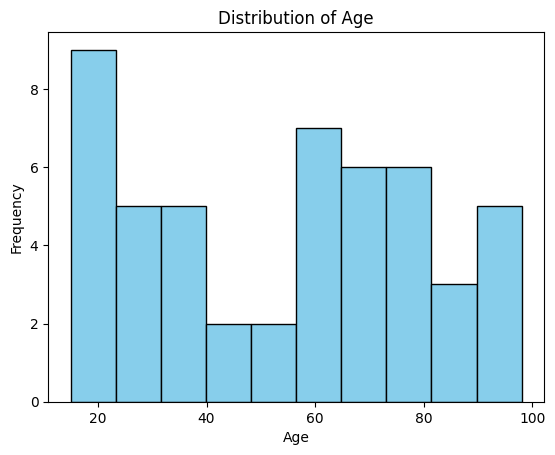

In [206]:
# Histogram for the 'age' column
plt.hist(dff['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

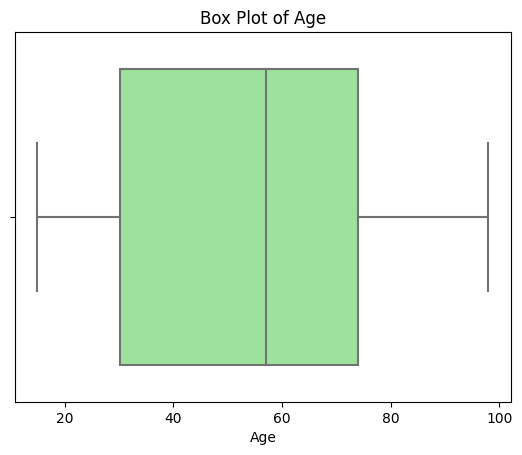

In [207]:
# Box plot for 'age' column
sns.boxplot(x=dff['age'], color='lightgreen')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

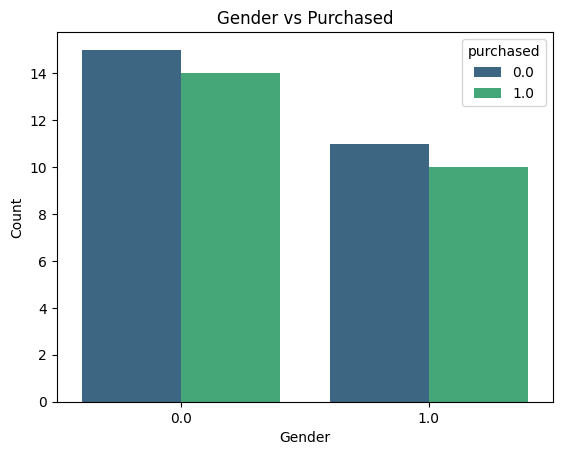

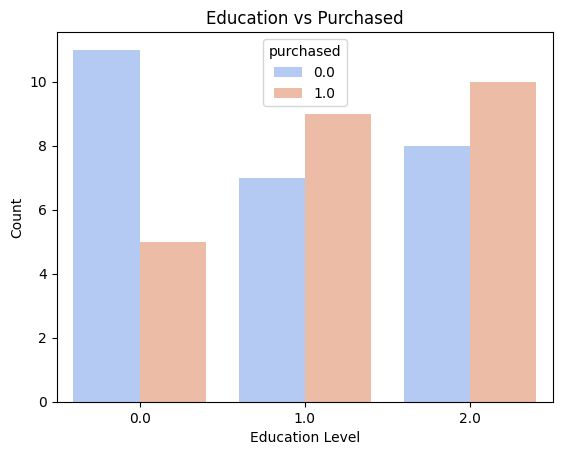

In [208]:
# Bar plot for 'gender' vs. 'purchased'
sns.countplot(x='gender', hue='purchased', data=dff, palette='viridis')
plt.title('Gender vs Purchased')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar plot for 'education' vs. 'purchased'
sns.countplot(x='education', hue='purchased', data=dff, palette='coolwarm')
plt.title('Education vs Purchased')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

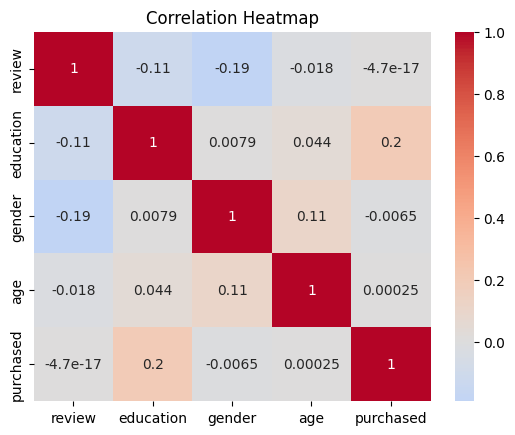

In [209]:
# Calculating correlation matrix for numerical columns
corr_matrix = dff[['review', 'education', 'gender', 'age', 'purchased']].apply(pd.to_numeric, errors='coerce').corr()

# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

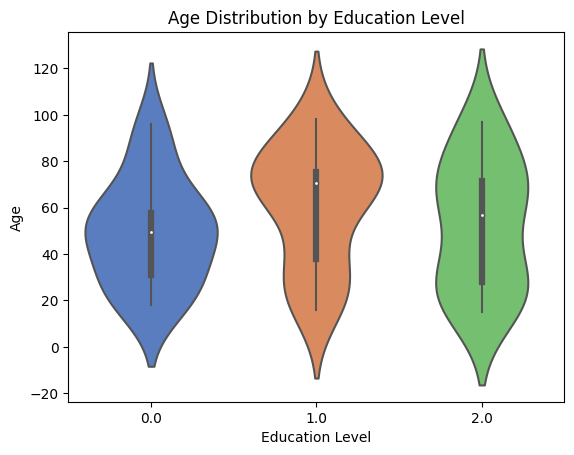

In [210]:
# Violin plot for 'age' across different 'education' levels
sns.violinplot(x='education', y='age', data=dff, palette='muted')
plt.title('Age Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.show()

In [211]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [212]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 90.00%
Confusion Matrix:
[[5 1]
 [0 4]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91         6
         1.0       0.80      1.00      0.89         4

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



In [214]:
# Feature importance
importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Display feature importances
for name, importance in zip(feature_names, importances):
    print(f'{name}: {importance:.4f}')

review: 0.1632
education: 0.1850
gender: 0.0644
age: 0.5874


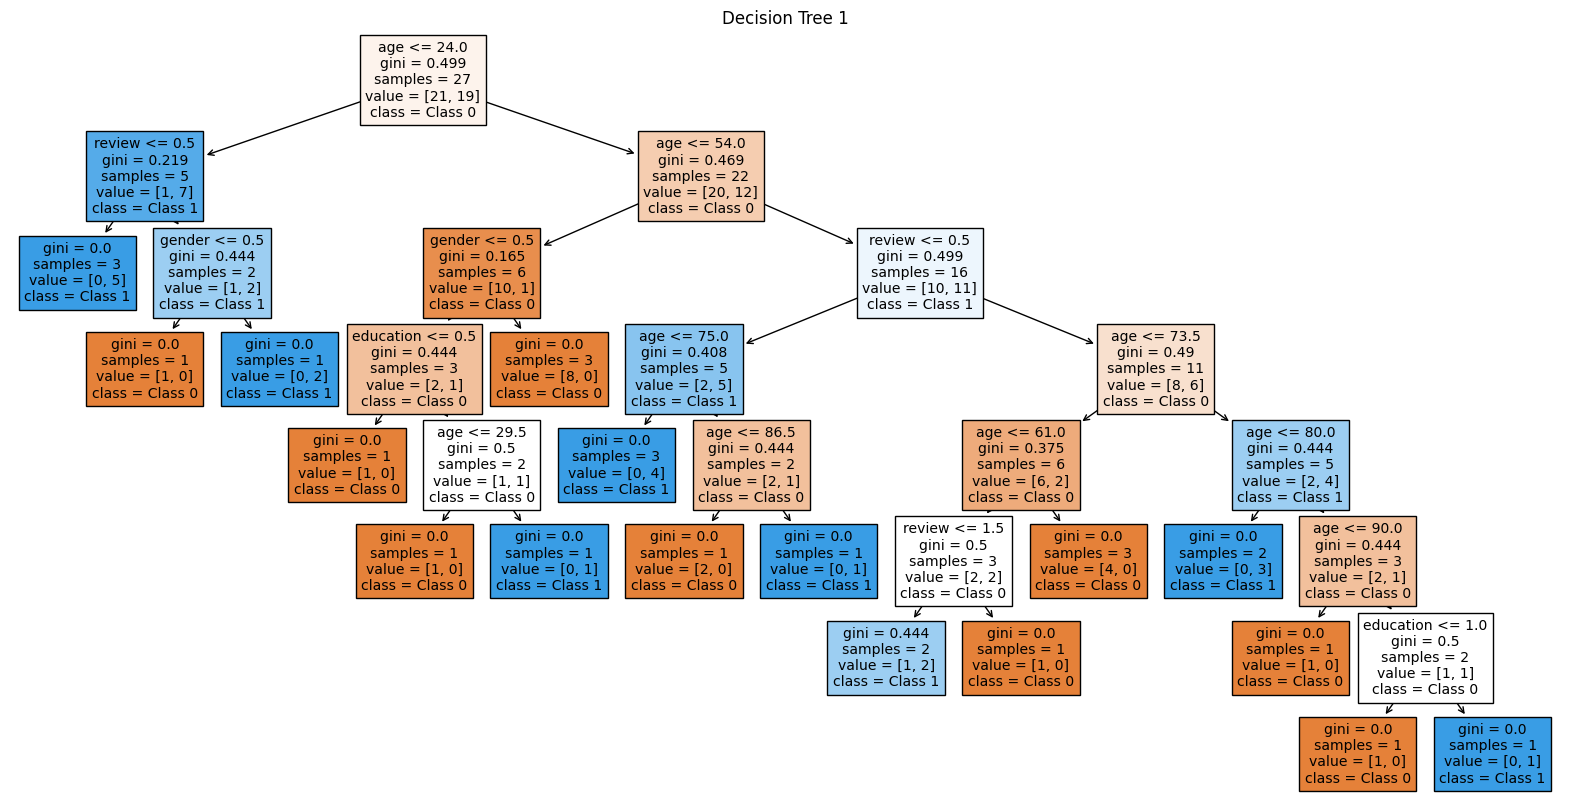

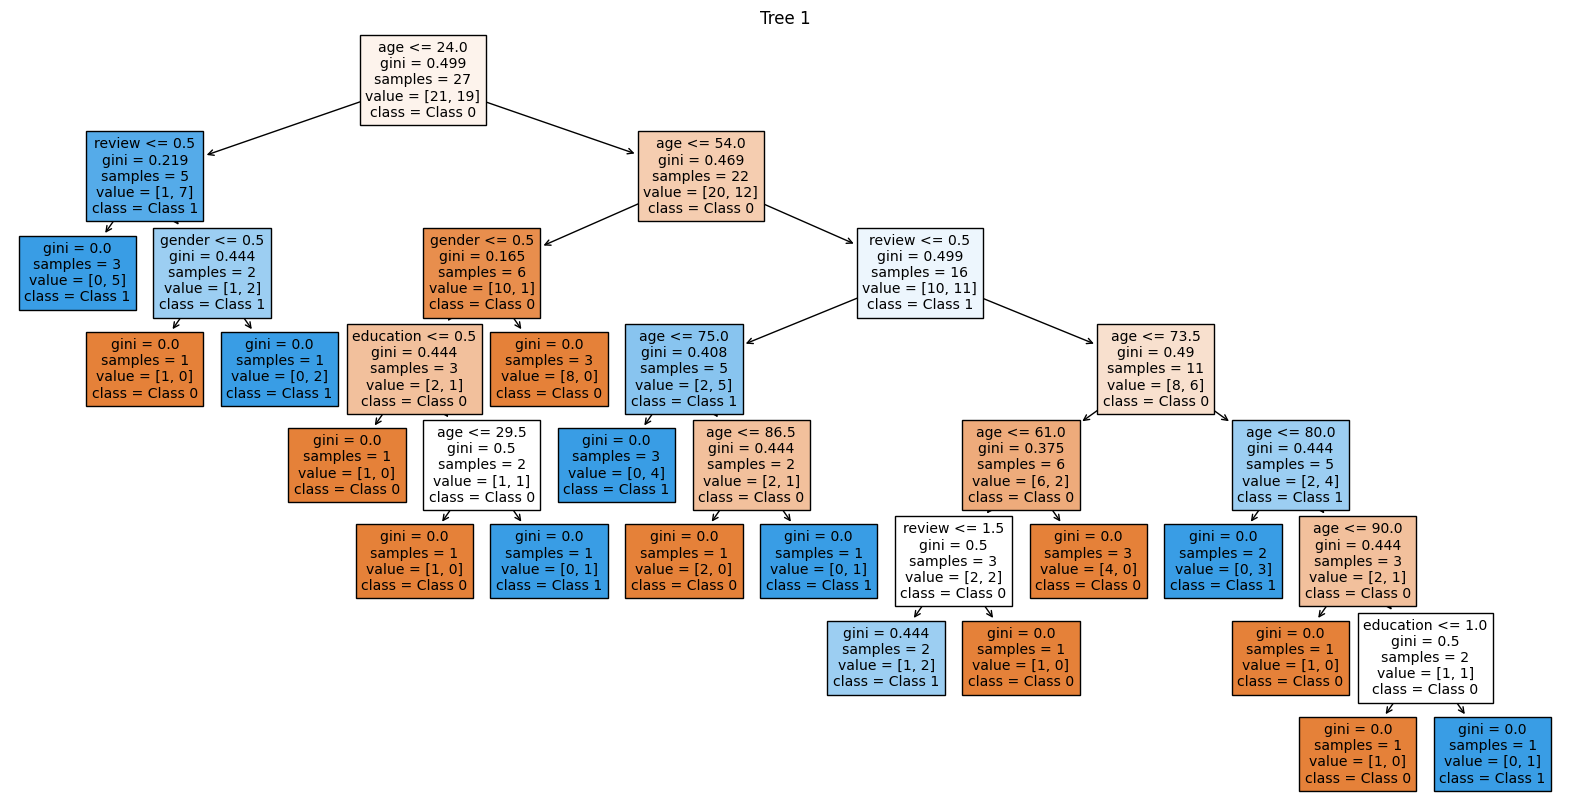

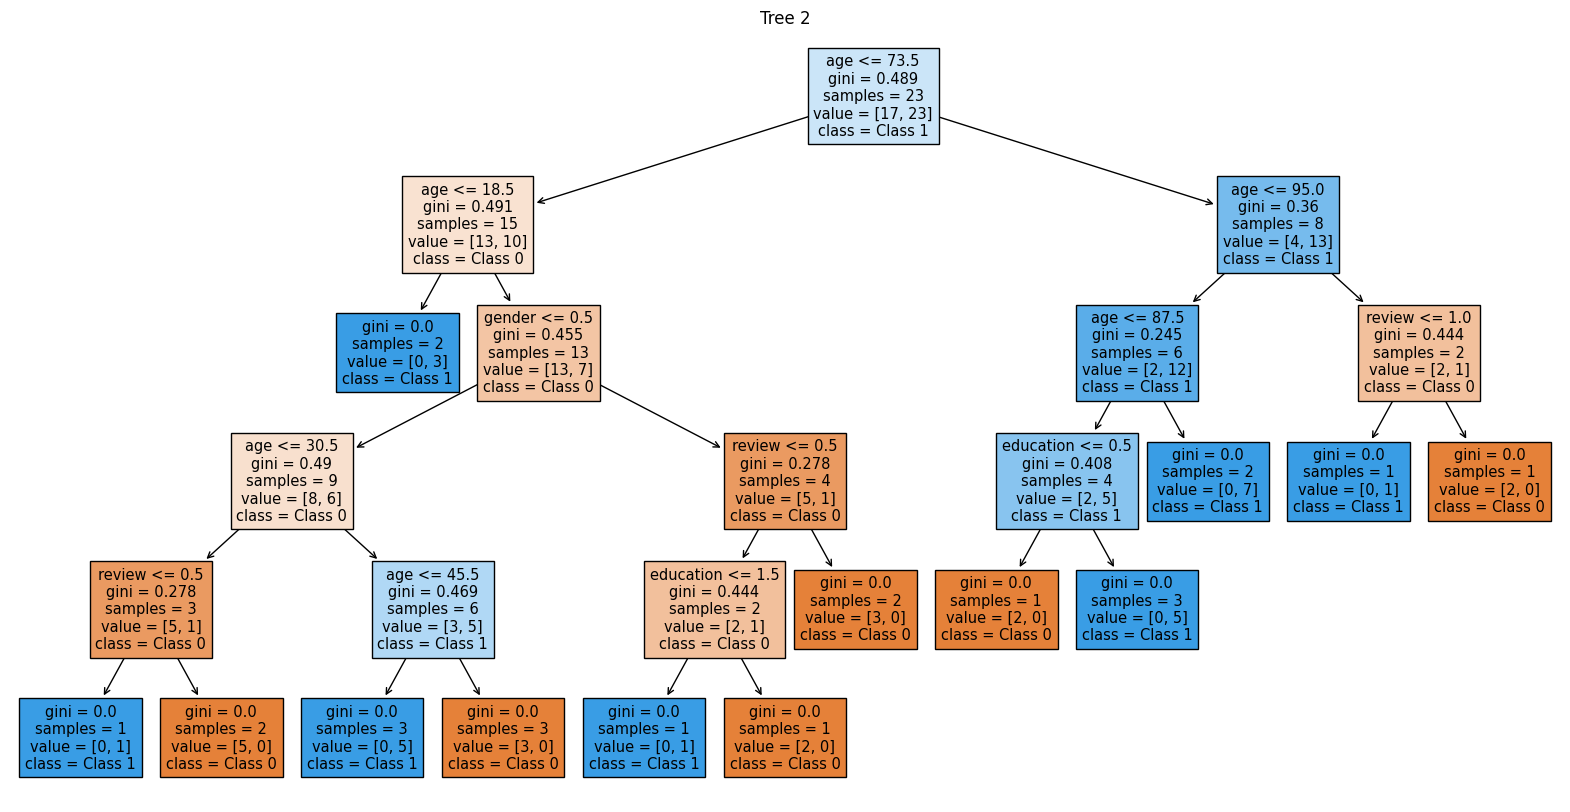

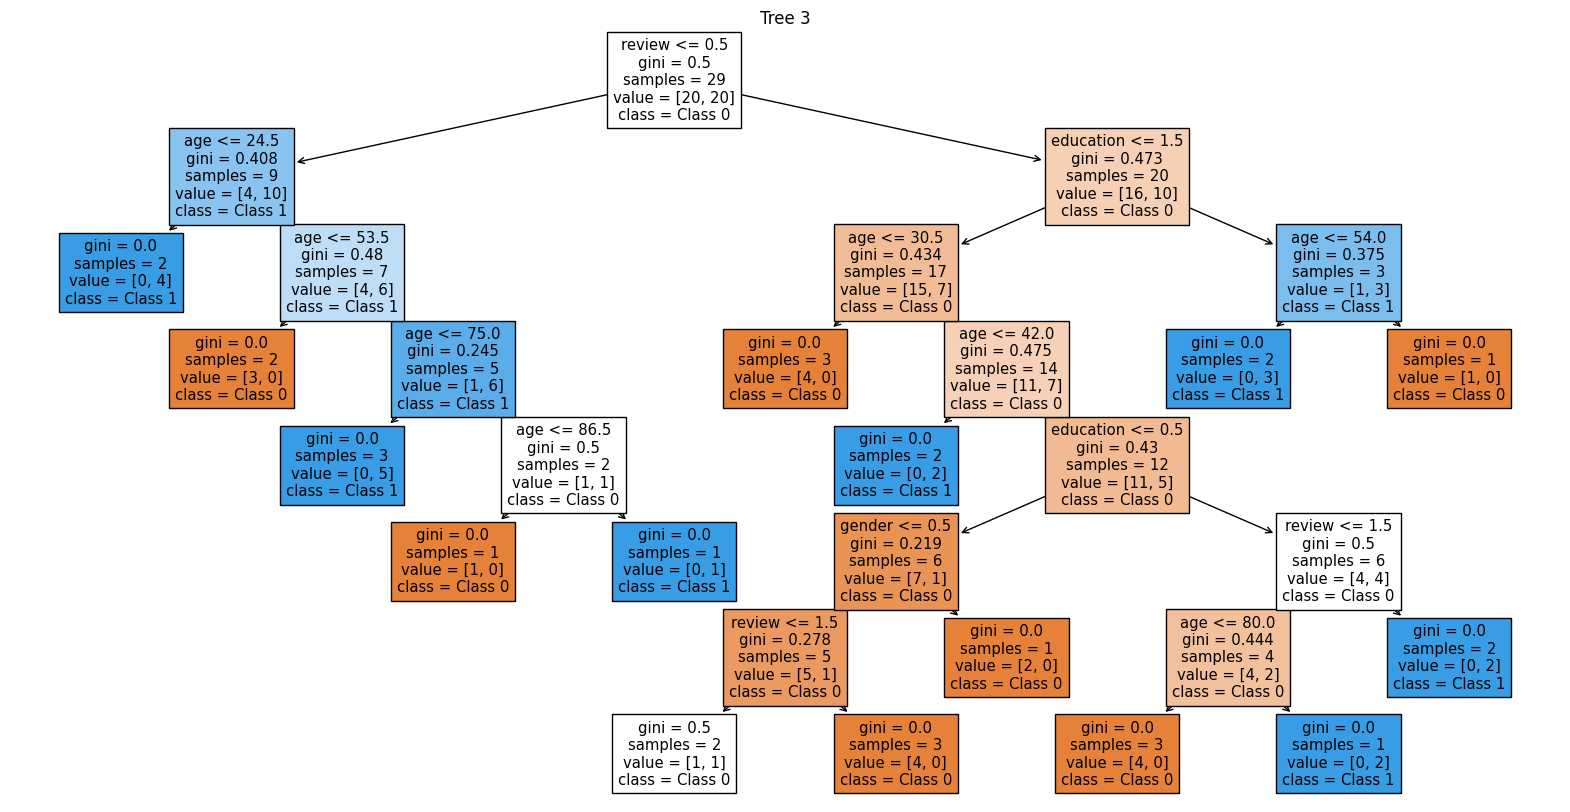

In [221]:
# Plot the first decision tree in the random forest
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=X_test.columns, class_names=['Class 0', 'Class 1'], filled=True, ax=ax)
plt.title('Decision Tree 1')
plt.show()

# Plotting rest of the trees
num_trees_to_plot = 3
for i in range(min(num_trees_to_plot, len(rf_classifier.estimators_))):
    fig, ax = plt.subplots(figsize=(20, 10)) 
    plot_tree(rf_classifier.estimators_[i], feature_names=X_test.columns, class_names=['Class 0', 'Class 1'], filled=True, ax=ax)
    plt.title(f'Tree {i + 1}')
    plt.show()